# Higher Education Students Performance Evaluation

## Scope

Do an exploratory data analysis on the HE Students Performance Evaluation dataset.

- Understand the overall data

- Do some basic cleaning and rename the columns

- Plot and gather insights

## Summary

Dropped a column `Student ID` and renamed the columns. Checked for missing values and then saved the data as parquet file.

**Personal**

- Majority of the students (35) had grade DD followed by around 32 students who had maximum grade of AA. Less than 10 students out of 145 students failed.

- Gender and Age :- There are more male students and they have significantly higher grades than female students. Majority of the students are under the age 26.

- Students graduated from private high school had the highest grades.

- Most students had recieved atleast 50% scholarship, although there was no linear correlation between scholarship type and grades.

- Most students did not do any additional work and had salary of USD 135-200. The students who did not do any work and the lowest salary band had the highest grades.

- Students who were active in sports or arts tend to do slightly better in academics.

- Most students took buses and lived in rental houses or dormitories. Students who cycles had below average grades but the accomodation of students did not affect their grades.

**Family**

- Students whose father had higher educational level tends to have higher grades. There was no such trend for mother's.

- The parents tend to marry between people with same educational level. There were some cases where father had more educaction than mother's but very few cases the other way around.

**Educational Habits**

- Half of the students studied Course 1. Students from Course 3 and 7 had the very high grade on average whereas the students from Course 1, 8 and 9 had very poor grades.

- Expected CPGA of students is positively correlated with the actual grades they get.

**Due to time constraints, I could not do a complete EDA.**

### Imports

In [1]:
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'altair:{alt.__version__}')
print(f'python:{sys.version}')

pandas:2.0.1
seaborn:0.12.2
altair:5.0.0
python:3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]


## Path

<ins>**Change the BASE path to your folder location**</ins>

In [3]:
BASE = r"C:\\Users\\anand\\Documents\\HE_Performance_3b"

PATH = BASE + r"\\data\\raw\\"

EXPORT = BASE + r"\\data\\processed\\"

## Read Data

In [4]:
# Read excel
df = pd.read_csv(PATH + r"DATA.csv", sep = ';')

# Preview
df.head(10)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,...,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,...,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,...,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,...,1,1,2,2,2,2,1,2,1,0


In [5]:
# Shape of data
df.shape

(145, 33)

In [6]:
# Preview columns
df.head().T

,0,1,2,3,4
STUDENT ID,STUDENT1,STUDENT2,STUDENT3,STUDENT4,STUDENT5
1,2,2,2,1,2
2,2,2,2,1,2
3,3,3,2,1,1
4,3,3,3,3,3
5,1,1,2,1,2
6,2,2,2,2,2
7,2,2,2,1,1
8,1,1,2,2,3
9,1,1,4,1,1


In [7]:
# Drop Student id column
df = df.drop('STUDENT ID', axis =1)

# Preview
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [8]:
# Mean and quantiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
2,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
3,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
4,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
5,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
6,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
7,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
8,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
9,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
10,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [9]:
# Check for null values
df.isna().any()

1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
COURSE ID    False
GRADE        False
dtype: bool

No null values

In [10]:
# Rename columns
df.columns = [
    'age',
    'sex',
    'grad_hs',
    'scholar_type',
    'add_work',
    'reg_art_sport',
    'partner',
    'total_salary',
    'transport_uni',
    'acc_type',
    'mother_edu',
    'father_edu',
    'siblings',
    'parental',
    'mother_occ',
    'father_occ',
    'weekly_study_hours',
    'rf_non_scientific',
    'rf_scientific',
    'attendance_seminar',
    'impact',
    'attendance_classes',
    'prep_friends',
    'prep_freq',
    'notes',
    'listening',
    'discussion',
    'flip-classroom',
    'cgpa_last_sem',
    'cgpa_expected',
    'course_id',
    'grade'
]

# Preview
df.head(1)

,age,sex,grad_hs,scholar_type,add_work,reg_art_sport,partner,total_salary,transport_uni,acc_type,...,prep_friends,prep_freq,notes,listening,discussion,flip-classroom,cgpa_last_sem,cgpa_expected,course_id,grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1


## EDA 

## Personal

### Grade

Text(0.5, 1.0, 'Distribution of grade')

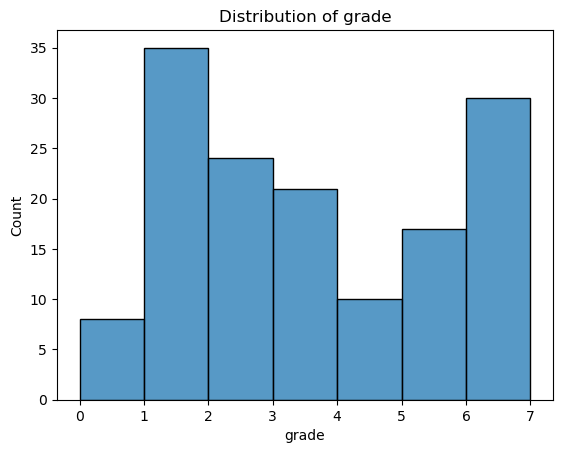

In [11]:
# Distribution of grade
sns.histplot(df.grade, bins = 7).set_title('Distribution of grade')

Majority of the students (35) had grade DD followed by around 32 students who had maximum grade of AA. Less than 10 students out of 145 students failed.

In [12]:
# Average grade
df.grade.mean()

3.2275862068965515

### Gender and Age

In [13]:
# Count of males and females
df.sex.value_counts()

sex
2    87
1    58
Name: count, dtype: int64

There are more male students than female students.

In [14]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('sex:O',title = 'Gender'),
    y=alt.Y('mean(grade):Q', title='Average grade')
).properties(
    title = 'Average grade per Gender ',
    height=350,
    width=400
)

alt.Chart(...)

Male students have significantly higher grades.

In [15]:
# Distribution of age group
df.age.value_counts()

age
2    70
1    65
3    10
Name: count, dtype: int64

Majority of students are under 26

In [16]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('age:O',title = 'Age group'),
    y=alt.Y('mean(grade):Q', title='Average grade')
).properties(
    title = 'Average grade per Age group ',
    height=350,
    width=400
)

alt.Chart(...)

Younger students tend to have higher grades on average with 26+ year olds have less than CB grade on average. 

### Graduated High school

In [17]:
# Distribution of graduated high school
df.grad_hs.value_counts()

grad_hs
2    103
1     25
3     17
Name: count, dtype: int64

71% of students are from state schools.

In [18]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('grad_hs:O',title = 'Graduated high school type'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade of per Graduated high school type ',
    height=350,
    width=400
)

alt.Chart(...)

Private students performed the worst.

### Scholarship type

In [19]:
# Distribution of scholarship type
df.scholar_type.value_counts()

scholar_type
3    76
4    42
5    23
2     3
1     1
Name: count, dtype: int64

Almost all the students had atleast 50% scholarship with majority having full scholarship.

In [20]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('scholar_type:O',title = 'Scholarship type'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per Scholarship type ',
    height=350,
    width=400
)

alt.Chart(...)

0% and 25% scholarship has too small sample size for the average grade to be reliable data.

### Regular artistic or sports activity

In [21]:
# Distribution of regular artistic or sports activity
df.reg_art_sport.value_counts()

reg_art_sport
2    87
1    58
Name: count, dtype: int64

Majority of students did not do arts or sports.

In [22]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('reg_art_sport:O',title = 'regular artistic or sports activity'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade if they did Regular artistic or sports activity or not ',
    height=350,
    width=400
)

alt.Chart(...)

Students who did arts or sports have slightly better grades.

### Partner

In [23]:
# Distribution of partner or not
df.partner.value_counts()

partner
2    84
1    61
Name: count, dtype: int64

More than half the students did not have partners.

In [24]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('partner:O',title = 'partner'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade if they had Partner or not ',
    height=350,
    width=400
)

alt.Chart(...)

Students who had partners have slightly better grades.

### Total salary and Additional Work

In [25]:
# Distribution of additional work
df.add_work.value_counts()

add_work
2    96
1    49
Name: count, dtype: int64

Majority of the students did not work.

Majority of students earned USD 135-200 whwereas very few people earned above USD 341.

In [26]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('add_work:O',title = 'Additional work'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade if they did Additional work or not ',
    height=350,
    width=400
)

alt.Chart(...)

Students who did not do additional work had higher grades.

In [27]:
# Distribution of total salary
df.total_salary.value_counts()

total_salary
1    93
2    27
3    16
5     5
4     4
Name: count, dtype: int64

In [28]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('total_salary:O',title = 'Total salary'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per total salary range ',
    height=350,
    width=400
)

alt.Chart(...)

Students who do higher paying jobs have lower grades.

### Transport and Accomodation

In [29]:
# Distribution of transportation
df.transport_uni.value_counts()

transport_uni
1    98
2    25
4    21
3     1
Name: count, dtype: int64

70% of students take bus, whereas remaining take private car/taxi or bicycle.

In [30]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('transport_uni:O',title = 'Transportation'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per Mode of transport',
    height=350,
    width=400
)

alt.Chart(...)

Students who cycles had significantly below average grades.

In [31]:
# Distribution of accomodation
df.acc_type.value_counts()

acc_type
1    68
2    49
3    27
4     1
Name: count, dtype: int64

Majority of the students lived in rental houses followed by dormitories. Remaining lived with family.

In [32]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('acc_type:O',title = 'Accomodation type'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per Accomodation type',
    height=350,
    width=400
)

alt.Chart(...)

Accomodation type does not significantly affect grades (`Other` accomodation type has small sample size to consider).

## Family

### Mother's and Father's Education

In [33]:
# Distribution of mother's education
df.mother_edu.value_counts()

mother_edu
1    54
3    39
2    27
4    21
5     2
6     2
Name: count, dtype: int64

Only 4 mother's have done Master's or PhD.

In [34]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('mother_edu:O',title = 'Mother\'s Education'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per Mother\'s Education',
    height=350,
    width=400
)

alt.Chart(...)

No signifcant trend seen in student's grades with mother's education. Students with mothers having MSc and PhD have too small sample size to compare.

In [35]:
# Distribution of father's education
df.father_edu.value_counts()

father_edu
3    46
2    36
1    29
4    28
5     5
6     1
Name: count, dtype: int64

Only 5 father's have done Masters and 1 father with PhD.

In [36]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('father_edu:O',title = 'Father\'s Education'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Average grade per Father\'s Education',
    height=350,
    width=400
)

alt.Chart(...)

Students whose father's have higher education levels tend to have higher grades.

### Correlation between education level of parents

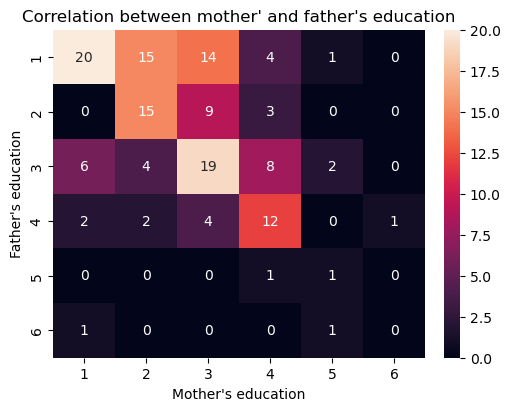

In [37]:
# Pivot data
data = df.groupby(['mother_edu', 'father_edu']).size().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)

# Plot mother and fathers education
plt.figure(figsize=(5, 4), constrained_layout=True)
sns.heatmap(data.astype(int), annot=True, fmt='d')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Correlation between mother\' and father\'s education', fontsize=12)
plt.show()

The parents of students tend to marry among the same education level in general. There are significant cases where father's education is higher than that of the mother but there are very few parents with the opposite behaviour.

### Educational Habits

### Expected CGPA and Last Semester CGPA

In [38]:
# Distribution of expected cgpa
df.cgpa_expected.value_counts()

cgpa_expected
3    61
2    38
4    30
1    16
Name: count, dtype: int64

In [39]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('cgpa_expected:O',title = 'Expected CGPA'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'Expected CGPA per Accomodation type',
    height=350,
    width=400
)

alt.Chart(...)

It seems that the expectation matches the actual grades where higher the expected CGPA, higher the grades.

In [40]:
# Distribution of expected cgpa
df.cgpa_last_sem.value_counts()

cgpa_last_sem
4    40
2    38
3    25
5    25
1    17
Name: count, dtype: int64

In [41]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('cgpa_last_sem:O',title = 'CGPA of last semester'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'CGPA of last semester per Accomodation type',
    height=350,
    width=400
)

alt.Chart(...)

Students who scored low in last semester had low grades, whereas those who scored higher scored high grades, although there is no straighforward linear trend.

### Course ID

**Due to time constraints, could not do a complete EDA**

In [42]:
# Distribution of course id
df.course_id.value_counts()

course_id
1    66
9    21
7    15
8    14
3     8
6     8
5     7
4     4
2     2
Name: count, dtype: int64

Half of the students study Course 1.

In [43]:
#Plot bar chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('course_id:O',title = 'Course ID'),
    y=alt.Y('mean(grade):Q', title='Average grade'),
).properties(
    title = 'CGPA of last semester per Course',
    height=350,
    width=400
)

alt.Chart(...)

Students from Course 3 and 7 had the very high grade on average whereas the students from Course 1, 8 and 9 had very poor grades.

### Export data

In [44]:
# Export to parquet
df.to_parquet(EXPORT + r"student_data.pqt",engine='pyarrow')